In [114]:
# Importing libraries

import json
from tqdm import tqdm
import numpy as np
from sklearn.preprocessing import StandardScaler
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
from datetime import datetime
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 

% matplotlib inline

In [2]:
# index.txt has the list of 50 stocks in NIFTY index

f = open('index.txt')
lines = list(f)
indices = [i.strip('\n') for i in lines]
f.close()

In [3]:
# main_dict[i] has stocks history of all 50 indices (not in sorted order).

main_dict = {}
for i in tqdm(indices[1:]):
#     print(i)
    fn='JSON/'+i+'.json'
    f = open(fn)
    lines = list(f)
    lines = lines[0]
    data = json.loads(lines)
    main_dict[i] = dict(sorted(data['history'].items(), reverse=True))

100%|██████████| 50/50 [00:00<00:00, 95.88it/s] 


In [4]:
# main_history has a common dataset of all 50 stocks are nifty-50 together forming 1400 days of data.

def create_main_history(colname):
    main_history = []
    fn='JSON/'+'NIFTY'+'.json'
    f = open(fn)
    lines = list(f)
    lines = lines[0]
    data = json.loads(lines)
    history = sorted(data['history'].items(), reverse=True)
    for i in tqdm(history):
        flag = 0
        for j in indices[1:]:
            if i[0] not in main_dict[j]:
                flag = 1
                break
        if flag==0:
            temp = {}
            for j in indices[1:]:
                temp[j] = main_dict[j][i[0]][colname]
            main_history.append((i[0],temp,i[1][colname]))
    return main_history

main_history = create_main_history('close')

100%|██████████| 4869/4869 [00:00<00:00, 69687.52it/s]


In [45]:
# Note: main_history is in reverse order and sorted. Starting from 18 April 2019 to 23 Februrary 2013.
# X has values of all 50 stocks. Y has the next day closing price of nifty-50
# Aim to calculate the price based on these stocks are not nifty-50.

X=[]
Y=[]
dates = []
for i in tqdm(range(1,len(main_history))):
    temp_x = []
#     print(main_history[i][0])
    dates.append(main_history[i-1][0])
    for j in indices[1:]:
        temp_x.append(main_history[i][1][j])
    X.append(temp_x)
    Y.append(main_history[i-1][2])

100%|██████████| 1400/1400 [00:00<00:00, 54810.10it/s]


In [46]:
# Splitting dataset into training and testing sets

Y = np.array(Y)
for i in range(len(X)):
    X[i] = np.array(X[i])
X = np.array(X)
Y = Y.reshape(-1, 1)

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
Y = scaler_y.fit_transform(Y)

X_train, Y_train = [], []
X_test, Y_test = [], []

Y_train = Y[int(len(Y)*0.2):][::-1]
X_train = X[int(len(X)*0.2):][::-1]

Y_test = Y[:int(len(Y)*0.2)][::-1]
X_test = X[:int(len(X)*0.2)][::-1]

len(X_train), len(Y_train), len(X_test), len(Y_test)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning:

Data with input dtype <U8 was converted to float64 by StandardScaler.

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning:

Data with input dtype <U8 was converted to float64 by StandardScaler.

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning:

Data with input dtype <U8 was converted to float64 by StandardScaler.

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning:

Data with input dtype <U8 was converted to float64 by StandardScaler.



(1120, 1120, 280, 280)

In [47]:
X = X[::-1]
Y = Y[::-1]

# X and Y are now in reverse order

In [13]:
# Cross validation method on a grid search technique to find optimal hyperparameter.

parameters = {'alpha': [1e-15, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1, 5, 10, 20, 40, 100, 500]}
neg_mean_sq_error = []

for i in parameters['alpha']:
    lasso_regressor = Lasso(alpha=i, normalize=True)
    cv_scores = cross_val_score(lasso_regressor, X, Y, scoring='neg_mean_squared_error', cv=5)
    # lasso_regressor.fit(X_train, Y_train)

    print(i, "Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
    neg_mean_sq_error.append(np.mean(cv_scores))

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause p

1e-15 Average 5-Fold CV Score: -0.01015168010123534


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause p

1e-10 Average 5-Fold CV Score: -0.010151593180852467


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause p

1e-09 Average 5-Fold CV Score: -0.010150811001604493


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause p

1e-08 Average 5-Fold CV Score: -0.010142997176623713


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause p

1e-07 Average 5-Fold CV Score: -0.010066120753444084


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause p

1e-06 Average 5-Fold CV Score: -0.009324625776660917


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause p

1e-05 Average 5-Fold CV Score: -0.00411119586401891


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



0.0001 Average 5-Fold CV Score: -0.0075549829548024906
0.001 Average 5-Fold CV Score: -0.0333987958213014
0.01 Average 5-Fold CV Score: -0.34772332282985285
0.1 Average 5-Fold CV Score: -1.4921001106071896
1 Average 5-Fold CV Score: -1.4921001106071896
5 Average 5-Fold CV Score: -1.4921001106071896
10 Average 5-Fold CV Score: -1.4921001106071896
20 Average 5-Fold CV Score: -1.4921001106071896
40 Average 5-Fold CV Score: -1.4921001106071896
100 Average 5-Fold CV Score: -1.4921001106071896
500 Average 5-Fold CV Score: -1.4921001106071896


In [14]:
data = [go.Scatter(x=parameters['alpha'], y=neg_mean_sq_error, name='Negative-Mean_Squared-Error')]
py.iplot(data, filename = 'nifty-50')

In [31]:
# Applying Lasso on the most optimal alpha value.

Y_pred = []
TS = 50
for i in tqdm(range(len(Y_test))):
    lasso_regressor = Lasso(alpha=1e-06, normalize=True, max_iter=10000)
    lasso_regressor.fit(X_train, Y_train)
    second_model=(mean_squared_error(y_true=Y_test[i].reshape(1, -1),y_pred=lasso_regressor.predict(X_test[i].reshape(1, -1))))
    Y_pred.append(lasso_regressor.predict(X_test[i].reshape(1, -1)))
    X_train = np.concatenate((X_train, X_test[i,:].reshape(1, -1)))
    Y_train = np.concatenate((Y_train, Y_test[i,:].reshape(1, -1)))

100%|██████████| 280/280 [06:50<00:00,  1.36s/it]


In [32]:
# Converting the scaled data to its original form

print(mean_squared_error(Y_pred, Y_test))
Y_pred = scaler_y.inverse_transform(Y_pred)
Y_transformed_test = scaler_y.inverse_transform(Y_test)

Y_pred = [i[0] for i in Y_pred]
# Y_pred

0.0027165711469637685


In [33]:
x = dates[:int(len(Y)*0.2)][::-1]
data = [go.Scatter(x=x, y=Y_transformed_test, name='Actual'), go.Scatter(x=x, y=Y_pred, name='Predicted')]
py.iplot(data, filename = 'nifty-50')

In [48]:
# using lasso regression to find out the best stocks to predict nifty-50

lasso_regressor = Lasso(alpha=3e-03, normalize=True)
lasso_regressor.fit(X, Y)

which = []
for i in range(len(lasso_regressor.coef_)):
    if lasso_regressor.coef_[i]<=0.0: which.append(False)
    else: which.append(True)

lasso_regressor.coef_

array([ 0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.12883221,  0.        , -0.        , -0.        ,
        0.07469512,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.05001982,
        0.03195572,  0.        ,  0.42662151,  0.        ,  0.        ,
        0.07759981,  0.        ,  0.09044103,  0.04461499,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00737699,  0.        ,  0.        ,  0.        ,  0.        ])

In [49]:
# which stocks are the best to calculate the nifty-50

features = []
for i in indices[1:]:
    features.append(i)
    
extracted = []
for i in range(len(features)):
    if which[i]==True: extracted.append(features[i])

print(extracted)

['GAIL', 'AXISBANK', 'M&M', 'ICICIBANK', 'HDFC', 'KOTAKBANK', 'LT', 'ADANIPORTS', 'INDUSINDBK']


In [34]:
Y = scaler_y.inverse_transform(Y)
X = scaler_x.inverse_transform(X)

In [35]:
# to compare the results of lasso regression vs pearson's correlation

df = pd.DataFrame(columns=indices)
c=0
for i in indices[1:]:
    df[i] = X[:, c]
    c+=1

In [36]:
df['NIFTY 50']=Y[:]

In [37]:
cor = df.corr(method='pearson')
cor[cor['NIFTY 50']>0.92031]['NIFTY 50']

NIFTY 50      1.000000
ASIANPAINT    0.929406
HINDUNILVR    0.925092
BAJAJFINSV    0.931401
MARUTI        0.930631
HDFCBANK      0.962048
BAJFINANCE    0.920352
BRITANNIA     0.929622
HDFC          0.978087
KOTAKBANK     0.962527
INDUSINDBK    0.939964
Name: NIFTY 50, dtype: float64

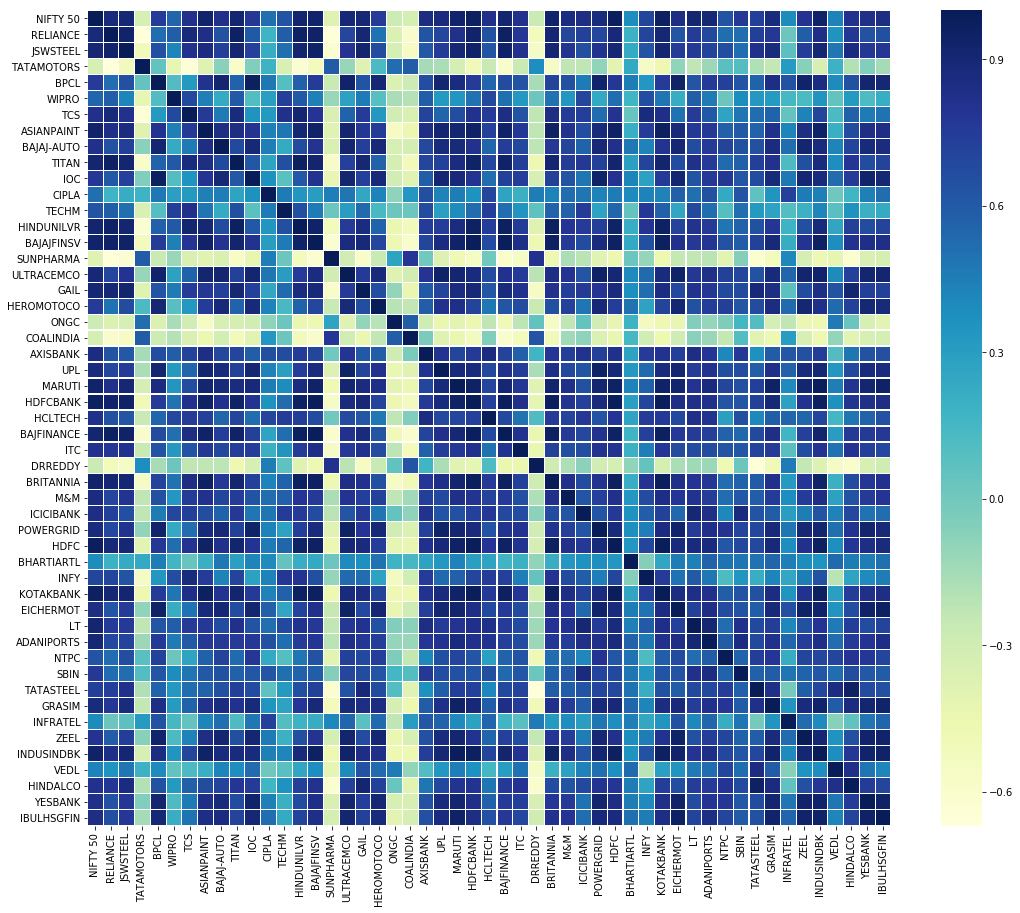

In [38]:
# seaborn visualization for correlation chart

corrmat = df.corr(method='pearson') 
  
f, ax = plt.subplots(figsize =(18, 15)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
f.savefig('pearson_select_threshold.png')

In [107]:
# building input and output data for ridge regression

X = []
Y = []
# extracted = ['BAJAJFINSV', 'DRREDDY', 'POWERGRID', 'KOTAKBANK', 'NTPC', 'ASIANPAINT', 'GAIL', 'CIPLA']
extracted = ['ASIANPAINT', 'HINDUNILVR', 'BAJAJFINSV', 'MARUTI', 'HDFCBANK', 'BAJFINANCE', 'BRITANNIA', 'HDFC', 'KOTAKBANK', 'INDUSINDBK']

i = len(main_history)
TS=1
while(i-TS-1>=0):
    temp = []
    for j in reversed(range(i-TS,i)):
#         print(main_history[j][0])
        for k in extracted:
#         for k in indices[1:]:
#             print(main_history[j][0], %killbgscripts, main_history[j][1][k])
            temp.append(float(main_history[j][1][k]))
        temp.append(float(main_history[j][2]))
#         break
#     print(len(temp))
    X.append(temp)
    Y.append(float(main_history[i-TS-1][2]))
#     break
    i-=1
Y = np.array(Y).reshape(-1,1)

In [108]:
# split the dataset into training and testing set

X_train = []
Y_train = []

X_test = []
Y_test = []

test_size = math.ceil(len(X)*0.2)
train_size = len(X)-test_size

scaler_x = StandardScaler()
SX = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
SY = scaler_y.fit_transform(Y)


X_train = SX[:train_size]
Y_train = SY[:train_size]

X_test = SX[train_size:]
Y_test = SY[train_size:]

X_test.shape, X_train.shape

((280, 11), (1120, 11))

In [109]:
# cross validation along with grid search to find optimal hyperparameter

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 2e-2, 3e-2, 4e-2, 1e-1, 1, 5, 10, 20, 40, 100, 500]}

for i in parameters['alpha']:
    ridge_regressor = Ridge(alpha=i, normalize=True, max_iter=5000)
    cv_scores = cross_val_score(ridge_regressor, SX, SY, scoring='neg_mean_squared_error', cv=5)
    # lasso_regressor.fit(X_train, Y_train)

    print(i, "Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

1e-15 Average 5-Fold CV Score: -0.002525640334916034
1e-10 Average 5-Fold CV Score: -0.0025256403662765963
1e-08 Average 5-Fold CV Score: -0.0025256434710288433
0.0001 Average 5-Fold CV Score: -0.002558933091898693
0.001 Average 5-Fold CV Score: -0.0030022615879109725
0.01 Average 5-Fold CV Score: -0.01068740174671009
0.02 Average 5-Fold CV Score: -0.017964492412565796
0.03 Average 5-Fold CV Score: -0.023749479195391675
0.04 Average 5-Fold CV Score: -0.028589454097945794
0.1 Average 5-Fold CV Score: -0.047537876802272346
1 Average 5-Fold CV Score: -0.0917231207854812
5 Average 5-Fold CV Score: -0.22214803085418228
10 Average 5-Fold CV Score: -0.40813114288259406
20 Average 5-Fold CV Score: -0.6792653985453565
40 Average 5-Fold CV Score: -0.9600313981270132
100 Average 5-Fold CV Score: -1.2334222792191265
500 Average 5-Fold CV Score: -1.433899607918626


In [100]:
# prediction of test set

Y_pred = np.array([]).reshape(-1,1)
TH=1
i=0
while i < (len(Y_test)):
    ridge_regressor = Ridge(alpha=1e-04, normalize=True, max_iter=10000)
    ridge_regressor.fit(X_train, Y_train)
    second_model=(mean_squared_error(y_true=Y_test[i:i+TH, :],y_pred=ridge_regressor.predict(X_test[i:i+TH, :])))
    Y_pred = np.concatenate((Y_pred, ridge_regressor.predict(X_test[i:i+TH, :])))
    X_train = np.concatenate((X_train, X_test[i:i+TH,:]))
    Y_train = np.concatenate((Y_train, Y_test[i:i+TH,:]))
    i+=TH

In [101]:
# inverse transformation to original scale of data

print(mean_squared_error(Y_test, Y_pred))
Y_pred = scaler_y.inverse_transform(Y_pred)
Y_transformed_test = scaler_y.inverse_transform(Y_test)
Y_pred

0.0037693962407787775


array([[10367.80871948],
       [10489.14457758],
       [10599.56425261],
       [10551.74600052],
       [10488.94990209],
       [10444.83335883],
       [10315.87542472],
       [10226.69028371],
       [10158.46066316],
       [10243.44394095],
       [10236.60280286],
       [10412.22705093],
       [10407.68446472],
       [10438.20297356],
       [10401.55886436],
       [10210.35265239],
       [10118.26148289],
       [10131.74880995],
       [10171.38150097],
       [10146.64810672],
       [10002.11322288],
       [10149.61531466],
       [10201.08255771],
       [10137.30901785],
       [10242.95479299],
       [10248.03317638],
       [10136.41349898],
       [10334.18485169],
       [10322.59670361],
       [10392.36336815],
       [10357.16226365],
       [10413.49535815],
       [10462.61060552],
       [10474.2376865 ],
       [10527.98209596],
       [10580.92403739],
       [10540.86370415],
       [10563.17540768],
       [10559.02310064],
       [10599.83125368],


In [78]:
x = dates[:int(len(Y)*0.2)][::-1]
data = [go.Scatter(x=x, y=Y_transformed_test, name='Actual'), go.Scatter(x=x, y=Y_pred, name='Predicted')]
py.iplot(data, filename = 'nifty-50')

In [110]:
# function to compare MSE against time step and time horizon

def ridge_helper(TS, TH):
    X = []
    Y = []
    # extracted = ['BAJAJFINSV', 'DRREDDY', 'POWERGRID', 'KOTAKBANK', 'NTPC', 'ASIANPAINT', 'GAIL', 'CIPLA']
    extracted = ['ASIANPAINT', 'HINDUNILVR', 'BAJAJFINSV', 'MARUTI', 'HDFCBANK', 'BAJFINANCE', 'BRITANNIA', 'HDFC', 'KOTAKBANK', 'INDUSINDBK']

    i = len(main_history)
    while(i-TS-1>=0):
        temp = []
        for j in reversed(range(i-TS,i)):
            for k in extracted:
                temp.append(float(main_history[j][1][k]))
            temp.append(float(main_history[j][2]))
        X.append(temp)
        Y.append(float(main_history[i-TS-1][2]))
        i-=1
    Y = np.array(Y).reshape(-1,1)
    
    X_train = []
    Y_train = []

    X_test = []
    Y_test = []

    test_size = math.ceil(len(X)*0.2)
    train_size = len(X)-test_size

    scaler_x = StandardScaler()
    SX = scaler_x.fit_transform(X)
    scaler_y = StandardScaler()
    SY = scaler_y.fit_transform(Y)


    X_train = SX[:train_size]
    Y_train = SY[:train_size]

    X_test = SX[train_size:]
    Y_test = SY[train_size:]

    parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 2e-2, 3e-2, 4e-2, 1e-1, 1, 5, 10, 20, 40, 100, 500]}
    cv_score = []
    for i in parameters['alpha']:
        ridge_regressor = Ridge(alpha=i, normalize=True, max_iter=5000)
        cv_scores = cross_val_score(ridge_regressor, SX, SY, scoring='neg_mean_squared_error', cv=5)
        
        cv_score.append(np.mean(cv_scores))
        
    best_alpha = parameters['alpha'][cv_score.index(max(cv_score))]
    
    Y_pred = np.array([]).reshape(-1,1)
    i=0
    while i < (len(Y_test)):
        ridge_regressor = Ridge(alpha=best_alpha, normalize=True, max_iter=10000)
        ridge_regressor.fit(X_train, Y_train)
        second_model=(mean_squared_error(y_true=Y_test[i:i+TH, :],y_pred=ridge_regressor.predict(X_test[i:i+TH, :])))
        Y_pred = np.concatenate((Y_pred, ridge_regressor.predict(X_test[i:i+TH, :])))
        X_train = np.concatenate((X_train, X_test[i:i+TH,:]))
        Y_train = np.concatenate((Y_train, Y_test[i:i+TH,:]))
        i+=TH
        
    return mean_squared_error(Y_test, Y_pred)

In [111]:
mse = []
for ts in tqdm(range(1, 21)):
    temp = []
    for th in range(1,11):
        temp.append(ridge_helper(ts, th))
    mse.append(temp)


100%|██████████| 20/20 [08:00<00:00, 37.27s/it]


In [112]:
mse

[[0.003039386744394285,
  0.0030419619036766783,
  0.00305329703416974,
  0.0030443269788113137,
  0.0030737293555077663,
  0.0030199563011418583,
  0.0030557168967164858,
  0.003024587782288243,
  0.0030531342767895694,
  0.003019612791644976],
 [0.003089985802001229,
  0.0030948563814033347,
  0.003098297765478559,
  0.003090880947894087,
  0.0031145114279288824,
  0.0030451995634007967,
  0.0031036069122203198,
  0.0030639595112317447,
  0.00308639129282749,
  0.0030494117415096056],
 [0.003134508513305309,
  0.0031314257593718048,
  0.0031413163026716173,
  0.0031362738807307737,
  0.0031715791178193757,
  0.003104263919703917,
  0.0031606442297291873,
  0.0031160834741109393,
  0.003144098961912348,
  0.0031118900719495847],
 [0.003195056387474925,
  0.0031886310132202603,
  0.003200428694951813,
  0.0032046687965643027,
  0.003225533237086253,
  0.0031712642821806396,
  0.003217689951247721,
  0.003176308193017762,
  0.0032094776862964286,
  0.0031692760131569455],
 [0.0032251577

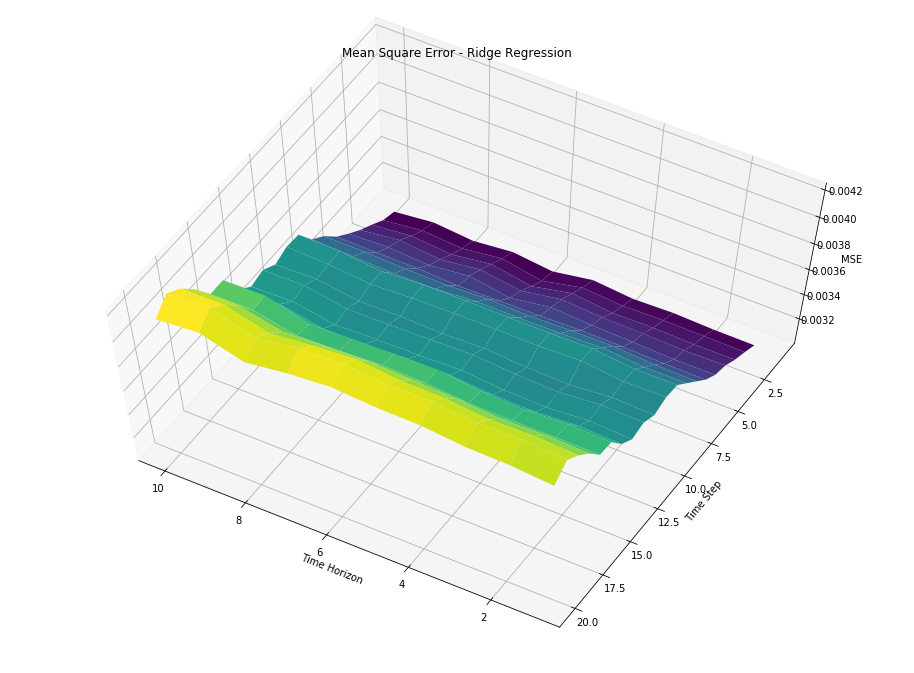

In [134]:
# 3D surface graph for MSE

x = range(1,21)
y = range(1,11)

X, Y = np.meshgrid(y, x)
Z = np.array(mse)

fig = plt.figure(figsize=(16,12))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('Mean Square Error - Ridge Regression')
ax.set_xlabel('Time Horizon')
ax.set_ylabel('Time Step')
ax.set_zlabel('MSE')

ax.view_init(65, 120)
# fig.savefig('which-timestep-is-better-for-which-horizon_ridge2.png')